# Part I - San Francisco  Bay Area Bike System Exploration
## by Ukachi Agnes, Eze-Mbey

## Introduction
The dataset to be analyzed includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
It contains start and end station of the bikes, start and end time of sharing, information on whether the user is a customer or susbcriber to the system, member gender and year of birth.

## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style = 'whitegrid')
%matplotlib inline
import math as mth

In [3]:
# Loading my data set
ford_go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#Getting shape of data set
ford_go_bike.shape

(183412, 16)

In [5]:
#Getting info of data set
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> This data set contains 183412 rows and 16 columns
### What is/are the main feature(s) of interest in your dataset?
The main features to be investigated are:
>a. Trend in age in users

>b. status of users (subscriber or customer)

>c. Trend in gender of users

>d. investigation of stations from most popular to least popular for both start and end time

>e. user active times
 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main features in the data set that will assit me in my investigation  are 

>a.the start and end stations

>b.member birth year

>c.member gender

>d. start and end time

>e. user type


# Data Wrangling


In [6]:
ford_go_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


member_birth_year is meant to be an int not a float

In [8]:
#calculalte the number missing values in each row of the dataset
ford_go_bike.isnull().sum() 

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
#Checking Unique Birth years
ford_go_bike.member_birth_year.unique()

array([ 1984.,    nan,  1972.,  1989.,  1974.,  1959.,  1983.,  1988.,
        1992.,  1996.,  1993.,  1990.,  1981.,  1975.,  1978.,  1991.,
        1997.,  1986.,  2000.,  1982.,  1995.,  1980.,  1973.,  1985.,
        1971.,  1979.,  1967.,  1998.,  1994.,  1977.,  1999.,  1987.,
        1969.,  1963.,  1976.,  1964.,  1965.,  1961.,  1968.,  1966.,
        1962.,  1954.,  1958.,  1960.,  1970.,  1956.,  1957.,  1945.,
        1900.,  1952.,  1948.,  1951.,  1941.,  1950.,  1949.,  1953.,
        1955.,  1946.,  1947.,  1931.,  1943.,  1942.,  1920.,  1933.,
        2001.,  1878.,  1901.,  1944.,  1928.,  1934.,  1939.,  1930.,
        1902.,  1910.,  1938.,  1927.])

# Data Cleaning

In [10]:
# drop any row with missing data
ford_go_bike = ford_go_bike.dropna() 
ford_go_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
#convert member birth year to int
ford_go_bike['member_birth_year'] = ford_go_bike.member_birth_year.astype(int) 

ford_go_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 22.7+ MB


In [12]:
#extract year from start and end time
ford_go_bike['year'] = pd.DatetimeIndex(ford_go_bike['start_time']).year 
ford_go_bike['end_year'] = pd.DatetimeIndex(ford_go_bike['end_time']).year
#extract start month from start time and end time
ford_go_bike['start_month'] = pd.DatetimeIndex(ford_go_bike['start_time']).month_name() 
ford_go_bike['end_month'] = pd.DatetimeIndex(ford_go_bike['end_time']).month_name() 
#extract start day from start time and end time
ford_go_bike['start_day'] = pd.DatetimeIndex(ford_go_bike['start_time']).day_name() 
ford_go_bike['end_day'] = pd.DatetimeIndex(ford_go_bike['end_time']).day_name()
 

In [13]:
ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,end_year,start_month,end_month,start_day,end_day
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019,2019,February,March,Thursday,Friday
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019,2019,February,March,Thursday,Friday
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,2019,2019,February,March,Thursday,Friday
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,2019,2019,February,March,Thursday,Friday
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,2019,2019,February,March,Thursday,Friday


In [14]:
#Getting users' ages
ford_go_bike['age'] = ford_go_bike.year - ford_go_bike.member_birth_year 

ford_go_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,year,end_year,start_month,end_month,start_day,end_day,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,2019,2019,February,March,Thursday,Friday,35
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,2019,2019,February,March,Thursday,Friday,47
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,2019,2019,February,March,Thursday,Friday,30
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,2019,2019,February,March,Thursday,Friday,45
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,2019,2019,February,March,Thursday,Friday,60


In [15]:
ford_go_bike.shape

(174952, 23)

In [16]:
#convert duration from seconds to minutes and thereafter, convert the datatype to float
ford_go_bike['duration_sec'] = ford_go_bike.duration_sec.apply(lambda x: '{:.2f}'.format(x/60))
ford_go_bike.rename(columns = {'duration_sec' : 'time_interval_min'}, inplace = True)
ford_go_bike['time_interval_min'] = ford_go_bike.time_interval_min.astype(float)

In [17]:
#list of features of interest to support the investigations

ford_go_bike_ = ford_go_bike[['bike_id', 'user_type', 'member_gender',  'age','start_station_name', 'end_station_name','start_day'
                            ,'start_month', 'end_day','end_month', 'time_interval_min', 'bike_share_for_all_trip']]
ford_go_bike_.head()

,bike_id,user_type,member_gender,age,start_station_name,end_station_name,start_day,start_month,end_day,end_month,time_interval_min,bike_share_for_all_trip
0,4902,Customer,Male,35,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Thursday,February,Friday,March,869.75,No
2,5905,Customer,Male,47,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Thursday,February,Friday,March,1030.90,No
3,6638,Subscriber,Other,30,Grove St at Masonic Ave,Central Ave at Fell St,Thursday,February,Friday,March,608.17,No
4,4898,Subscriber,Male,45,Frank H Ogawa Plaza,10th Ave at E 15th St,Thursday,February,Friday,March,26.42,Yes
5,5200,Subscriber,Male,60,4th St at Mission Bay Blvd S,Broadway at Kearny,Thursday,February,Friday,March,29.88,No


In [18]:
ford_go_bike_.shape

(174952, 12)

In [98]:
ford_go_bike_.start_month.value_counts()

February    174952
Name: start_month, dtype: int64


### What is the structure of your dataset?

> This data set contains 174952 rows and 12 columns
### What is/are the main feature(s) of interest in your dataset?
The main features to be investigated are:
>a. Trend in age in users

>b. status of users (subscriber or customer)

>c. Trend in gender of users

>d. investigation of stations from most popular to least popular for both start and end time

>e. user active times
 
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main features in the data set that will assit me in my investigation  are 

>a.bike_id

>b. user_type 

>c. member_gender 

>d. age

>e. start_station_name

>f. end_station_name

>g. start_day

>h. start_month 

>i. end_day

>j. end_month

>k. time_interval_min

>l. bike_share_for_all_trip

## Univariate Exploration
 


### Exploration 1

What is the percentage of customer and subscriber users?

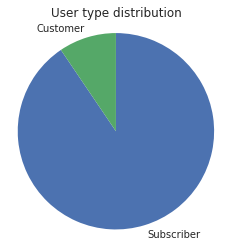

In [19]:
user_pie = ford_go_bike_['user_type'].value_counts()

plt.pie(user_pie, labels = user_pie.index, startangle = 90,
        counterclock = False);
plt.title('User type distribution')
plt.axis('square')
user_pie.index
plt.savefig('image01.png');

#### Insight

In [20]:
ford_go_bike_.user_type.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

Subscriber    90.5%
Customer       9.5%
Name: user_type, dtype: object

Over 90% of the users are subscribers while less than than 10% are customers

### Exploration 2 

What is the number of trips in each start day of the week?

In [21]:
#def a function to visualize categorical univariate data
def viz(var, color):
    base_color = sb.color_palette()[color]
    return sb.countplot(data = ford_go_bike_, x = var, color = base_color)

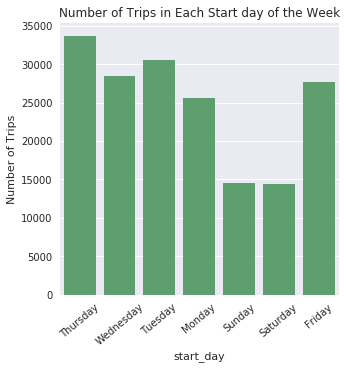

In [82]:
viz('start_day', 1)
plt.title('Number of Trips in Each Start day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation =760)
plt.savefig('image02.png');

#### Insight

In [23]:
ford_go_bike_.start_day.value_counts(normalize = False)

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

In [24]:
ford_go_bike_.start_day.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

Thursday     19.3%
Tuesday      17.5%
Wednesday    16.2%
Friday       15.8%
Monday       14.7%
Sunday        8.3%
Saturday      8.2%
Name: start_day, dtype: object

Thursdays have the most users starting with 19.3% (33712 users) and Saturdays with the least with 8.2%

### Exploration 3 

What is the number of trips in each end day of the week?

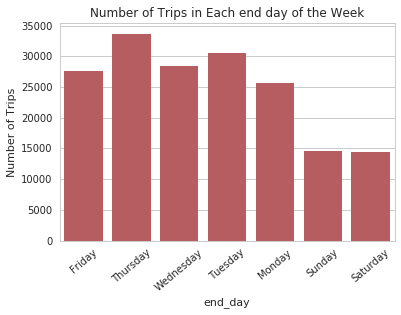

In [25]:
viz('end_day', 2)
plt.title('Number of Trips in Each end day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation =760)
plt.savefig('image03.png');

In [26]:
ford_go_bike_.end_day.value_counts(normalize = False)

Thursday     33707
Tuesday      30591
Wednesday    28417
Friday       27655
Monday       25641
Sunday       14519
Saturday     14422
Name: end_day, dtype: int64

In [27]:
ford_go_bike_.end_day.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

Thursday     19.3%
Tuesday      17.5%
Wednesday    16.2%
Friday       15.8%
Monday       14.7%
Sunday        8.3%
Saturday      8.2%
Name: end_day, dtype: object

#### Insight

Thursdays are the busiest end days with 33707 users and saturdays are the least busiest with 14422 users

### Exploration 4


What is the gender distribution?

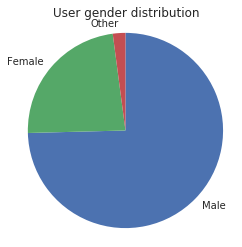

In [28]:
gender_pie = ford_go_bike_['member_gender'].value_counts()

plt.pie(gender_pie, labels = gender_pie.index, startangle = 90,
        counterclock = False);
plt.title('User gender distribution')
plt.axis('square')
gender_pie.index
plt.savefig('image04.png');

#### Insight

In [29]:
ford_go_bike_.member_gender.value_counts(normalize = False)

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [30]:
ford_go_bike_.member_gender.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

Male      74.6%
Female    23.3%
Other      2.1%
Name: member_gender, dtype: object

23.3% of the users are female, 74.6 % are male and 2.1% other

### Exploration 5 

What is the bike sharing ratio for all trips?

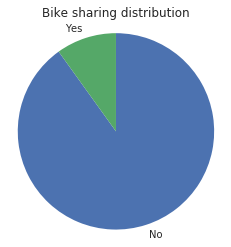

In [31]:
share_pie = ford_go_bike_['bike_share_for_all_trip'].value_counts()

plt.pie(share_pie, labels = share_pie.index, startangle = 90,
        counterclock = False);
plt.title('Bike sharing distribution')
plt.axis('square')
share_pie.index
plt.savefig('image05.png');

#### Insight

In [32]:
ford_go_bike_.bike_share_for_all_trip.value_counts(normalize = False)

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [33]:
ford_go_bike_.bike_share_for_all_trip.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

No     90.1%
Yes     9.9%
Name: bike_share_for_all_trip, dtype: object

Less than 10%(17346 users) shared bikes for all trips while over 90%(157606) did not.

### Exploration 6

What is the distribution of ages in the data set ?

The description of the age column is needed to know the maximum and minimum ages for the plot

In [34]:
ford_go_bike_['age'].describe() 

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

The maximum age is 141, the minimum is 18.

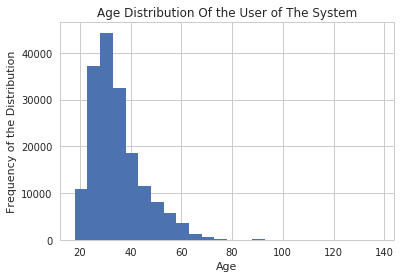

In [35]:
bins = np.arange(18, 141, 5)
plt.hist(data = ford_go_bike_, x = 'age', bins = bins)
plt.title('Age Distribution Of the User of The System')
plt.xlabel('Age')
plt.ylabel('Frequency of the Distribution')
plt.savefig('image06.png');

#### Insight

Most users are between the ages of 25 and 40 years, with the mean age being 34 years

### Exploration 7

What is the time distribution?

In [36]:
ford_go_bike_['time_interval_min'].describe() 

count    174952.000000
mean         11.733373
std          27.370085
min           1.020000
25%           5.380000
50%           8.500000
75%          13.150000
max        1409.130000
Name: time_interval_min, dtype: float64

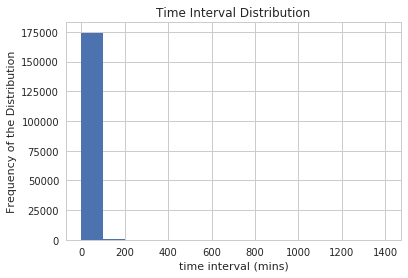

In [37]:
bins = np.arange(1,1500, 100)
plt.hist(data = ford_go_bike_, x = 'time_interval_min', bins = bins)
plt.title('Time Interval Distribution')
plt.xlabel('time interval (mins)')
plt.ylabel('Frequency of the Distribution')
plt.savefig('image07.png');


Seeing that the distribution is between, 0 and 100, we scale down

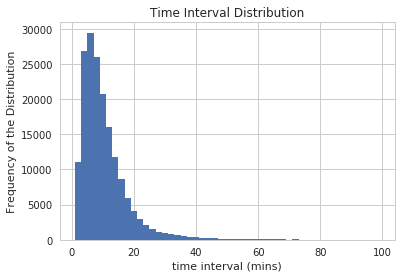

In [38]:
bins = np.arange(1,100, 2)
plt.hist(data = ford_go_bike_, x = 'time_interval_min', bins = bins)
plt.title('Time Interval Distribution')
plt.xlabel('time interval (mins)')
plt.ylabel('Frequency of the Distribution')
plt.savefig('image08.png');


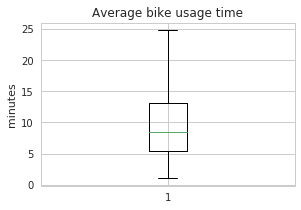

In [39]:
#bins = np.arange(0, df.duration_min.max()+50, 50)
plt.figure(figsize=(10,3))
plt.subplot(122)
plt.title("Average bike usage time")
plt.ylabel("minutes")
plt.boxplot(data = ford_go_bike_, x = 'time_interval_min', showfliers =False )
plt.savefig('image09.png');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The age distribution was was the only variable of interest with unusual points.The maximum age was 141. I did not perform any transformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>Out of all the features investigated, i only transformed the time interval from seconds to minutes!

## Bivariate Exploration


### Exploration 8

What is the ratio of male to female users?

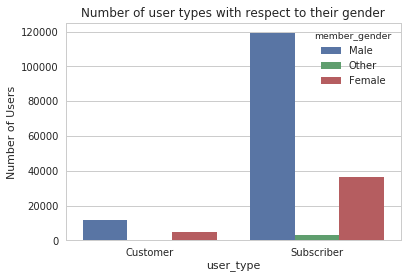

In [40]:
sb.countplot(data = ford_go_bike_, x = 'user_type', hue = 'member_gender')
plt.title('Number of user types with respect to their gender')
plt.ylabel('Number of Users')
plt.savefig('image10.png');

In [41]:
ford_go_bike_.groupby('member_gender').user_type.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'


member_gender  user_type 
Female         Subscriber    88.7%
               Customer      11.3%
Male           Subscriber    91.2%
               Customer       8.8%
Other          Subscriber    87.7%
               Customer      12.3%
Name: user_type, dtype: object

In [42]:
ford_go_bike_.groupby('member_gender').user_type.value_counts(normalize = False)

member_gender  user_type 
Female         Subscriber     36182
               Customer        4623
Male           Subscriber    119007
               Customer       11493
Other          Subscriber      3197
               Customer         450
Name: user_type, dtype: int64

#### Insight

91.2%(119007)of the male users are subscribers while 88.7%(36182) of the female users are subscribers

### Exploration 9

What is the relationship between user type and bike sharing?

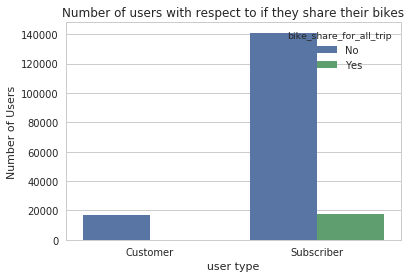

In [43]:
sb.countplot(data = ford_go_bike_, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.title('Number of users with respect to if they share their bikes')
plt.ylabel('Number of Users')
plt.xlabel('user type')
plt.savefig('image11.png');

In [44]:
ford_go_bike_.groupby('user_type').bike_share_for_all_trip.value_counts(normalize = False)

user_type   bike_share_for_all_trip
Customer    No                          16566
Subscriber  No                         141040
            Yes                         17346
Name: bike_share_for_all_trip, dtype: int64

In [45]:
ford_go_bike_.groupby('user_type').bike_share_for_all_trip.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'


user_type   bike_share_for_all_trip
Customer    No                         100.0%
Subscriber  No                          89.0%
            Yes                         11.0%
Name: bike_share_for_all_trip, dtype: object

#### Insight

No customer shared bikes for all trips while only 11%(17346) of subscribed users shared bikes for all trips

### Exploration 10

What is the relationship between member gender and bike sharing ?

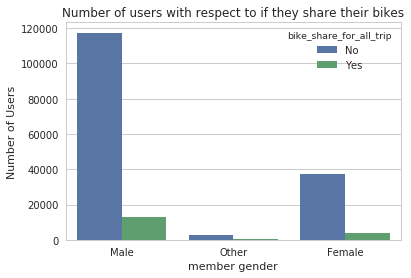

In [46]:
sb.countplot(data = ford_go_bike_, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.title('Number of users with respect to if they share their bikes')
plt.ylabel('Number of Users')
plt.xlabel('member gender')
plt.savefig('image12.png');

In [47]:
ford_go_bike_.groupby('member_gender').bike_share_for_all_trip.value_counts(normalize = False)

member_gender  bike_share_for_all_trip
Female         No                          37211
               Yes                          3594
Male           No                         117396
               Yes                         13104
Other          No                           2999
               Yes                           648
Name: bike_share_for_all_trip, dtype: int64

In [48]:
ford_go_bike_.groupby('member_gender').bike_share_for_all_trip.value_counts(normalize = True).mul(100).round(1).astype(str)+'%'

member_gender  bike_share_for_all_trip
Female         No                         91.2%
               Yes                         8.8%
Male           No                         90.0%
               Yes                        10.0%
Other          No                         82.2%
               Yes                        17.8%
Name: bike_share_for_all_trip, dtype: object

#### Insight

About 90%(117396) of the male users did not share their bikes and 91.2%(37211) of females did not also

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> For users and sharing bikes, no customer user shared their bikes.

> For gender distribution in relation with sharing bikes, females were more likely to not share bikes compared to their male counterparts.

> Male users were the most subscribed with about 91.2%.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, i did not

## Multivariate Exploration


### Exploration 11

What is the relation between start_day , duration_min and user_type

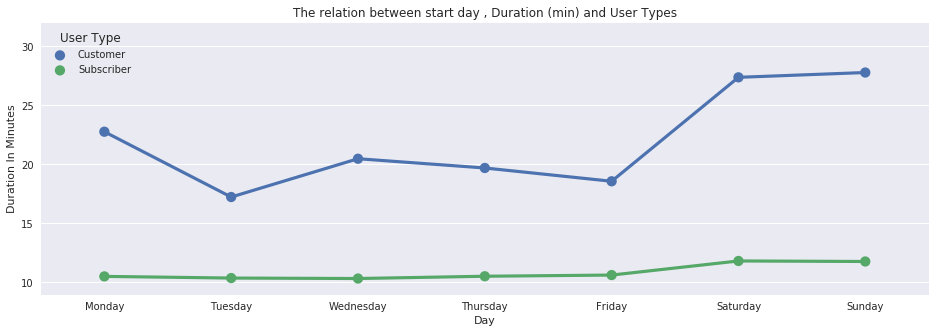

In [86]:

plt.figure(figsize=[35, 5])
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
plt.subplot(1, 2, 1)
sb.pointplot(data=ford_go_bike_, x='start_day', y='time_interval_min', hue='user_type', errwidth=0, order=order)
plt.xlabel('Day')
plt.ylabel('Duration In Minutes')
plt.title('The relation between start day , Duration (min) and User Types')
plt.legend(title='User Type')
plt.savefig('image13.png');

#### Insight

Customers and Subscribers ride longest on the weekends compared to the weekdays

### Exploration 12

What is the relationship between end day, user type and  time interval?

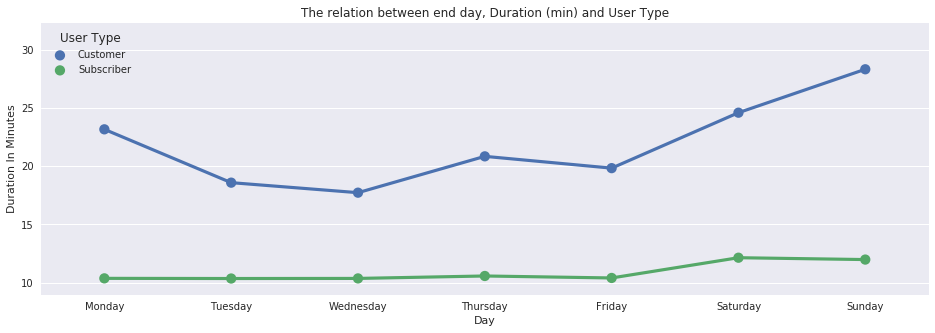

In [99]:
plt.figure(figsize=[35, 5])
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
plt.subplot(1, 2, 1)
sb.pointplot(data=ford_go_bike_, x='end_day', y='time_interval_min', hue='user_type', errwidth=0, order=order)
plt.xlabel('Day')
plt.ylabel('Duration In Minutes')
plt.title('The relation between end day, Duration (min) and User Type')
plt.legend(title='User Type')
plt.savefig('image14.png');

#### Insight

The weekends also have the longest ride on end days

### Exploration 13

What's the relationship between user type, age and gender?

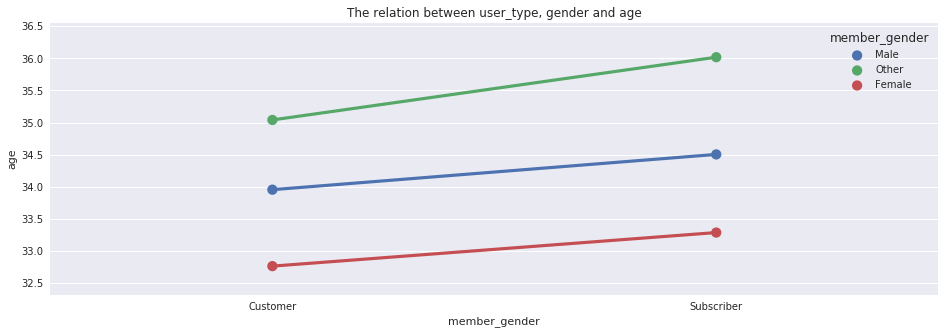

In [104]:

plt.figure(figsize=[35, 5])
plt.subplot(1, 2, 1)
sb.pointplot(data=ford_go_bike_, x='user_type', y='age', hue='member_gender', errwidth=0,)
plt.xlabel('member_gender')
plt.ylabel('age')
plt.title('The relation between user_type, gender and age')
plt.legend(title='member_gender')
plt.savefig('image15.png');


#### Insight

>All subscibers regardless of gender were older than all customers.

>Also,the unspecified other gender users were the oldest users while the female users are the youngest users

### Exploration 14

What is the relationship between member gender, user type and  time interval?

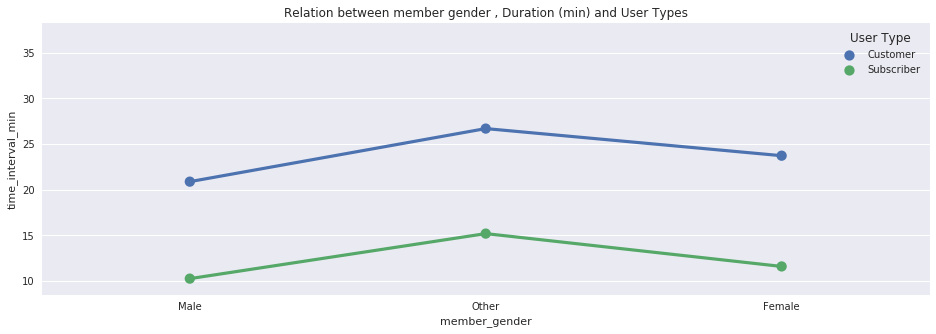

In [101]:
plt.figure(figsize=[35, 5])
plt.subplot(1, 2, 1)
sb.pointplot(data=ford_go_bike_, x='member_gender', y='time_interval_min', hue='user_type', errwidth=0)
plt.xlabel('member_gender')
plt.ylabel('time_interval_min')
plt.title('Relation between member gender , Duration (min) and User Types')
plt.legend(title='User Type')
plt.savefig('image16.png');


#### Insight

The male subscribers ride for the shortest time. The other gender customer rode for the longest

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, the start and end days duration of rides were very similar with the weekends having the longest rides for both start and end days

### Were there any interesting or surprising interactions between features?

> No, there was not


## Conclusions
During exploration, the dataset was cleaned and wrangled to get rid of null rows. After which visualiztions to draw inisghts were created


In summary, these are the major insights gotten:

> Subscribers are the most user type(90.5%).

> There are more male users(74.6%) than any other gender

> Users would rather not share their bikes

> Thursdays have the most trips started(33712 trips) and ended(33707 trips)

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. 